# Activation analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


% load file names 

In [3]:
import os
import pandas as pd

Emil = True

if Emil:
    base_path = r"C:\Users\ASUS\Documents\11. sem - kand\Data\Frequency"
else:
    base_path = r"C:\Users\Gustav\Documents\Thesis\data\Frequency"


In [4]:
import os

# Specify the folder path
folder_path = base_path

# Get a list of all files in the folder
file_names = os.listdir(folder_path)


In [5]:
import os
import pandas as pd

# Create a dictionary to store the loaded dataframes
dataframes = {}

# Create a list to store the dataframe names
dataframe_names = []

# Load the CSV files and store them in the dictionary
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    dataframe_name = file_name  # Remove the ".csv" extension and the first 3 characters, so only the CD numer is there
    dataframes[dataframe_name] = pd.read_csv(file_path, parse_dates=['Time'])
    dataframe_names.append(dataframe_name)


KeyboardInterrupt: 

In [19]:
dataframes

{'2022-03-23.csv':                           Time     Value
 0      2022-03-23 00:00:00.000  50.05250
 1      2022-03-23 00:00:00.100  50.05258
 2      2022-03-23 00:00:00.200  50.05353
 3      2022-03-23 00:00:00.300  50.05216
 4      2022-03-23 00:00:00.400  50.05318
 ...                        ...       ...
 718261 2022-03-23 23:59:59.500  50.04286
 718262 2022-03-23 23:59:59.600  50.04253
 718263 2022-03-23 23:59:59.700  50.04073
 718264 2022-03-23 23:59:59.800  50.04154
 718265 2022-03-23 23:59:59.900  50.04078
 
 [718266 rows x 2 columns],
 '2022-03-24.csv':                           Time     Value
 0      2022-03-24 00:00:00.000  50.03944
 1      2022-03-24 00:00:00.100  50.03922
 2      2022-03-24 00:00:00.200  50.03865
 3      2022-03-24 00:00:00.300  50.03873
 4      2022-03-24 00:00:00.400  50.04094
 ...                        ...       ...
 863757 2022-03-24 23:59:59.500  50.07795
 863758 2022-03-24 23:59:59.600  50.07851
 863759 2022-03-24 23:59:59.700  50.07812
 863760 20

In [219]:
type(dataframes["2022-03-23.csv"])

pandas.core.frame.DataFrame

In [221]:
dataframes["2022-03-23.csv"]["Value"]

0         50.05250
1         50.05258
2         50.05353
3         50.05216
4         50.05318
            ...   
718261    50.04286
718262    50.04253
718263    50.04073
718264    50.04154
718265    50.04078
Name: Value, Length: 718266, dtype: float64

In [223]:
df_dataframes = []

start_date = '2022-03-23'
end_date = '2023-01-22'

dates = pd.date_range(start=start_date, end=end_date)
for date in dates:
    specific_dataframe = dataframes[date.strftime('%Y-%m-%d') + ".csv"]
    df_dataframes += [item for item in specific_dataframe['Value'][::50]]

In [224]:
len(df_dataframes)

5283217

In [225]:
counter_under = 0
counter_over = 0

for i in range(0,len(df_dataframes)):
    if df_dataframes[i] <= 49.9:
        counter_under += 1
    if df_dataframes[i] >= 50.1:
        counter_over += 1

In [226]:
counter_under,counter_over

(42840, 53980)

In [227]:
counter_under/len(df_dataframes)*100 , counter_over/len(df_dataframes)*100

(0.8108695894944312, 1.0217259673414891)

In [228]:
len(df_dataframes[0:17280])

17280

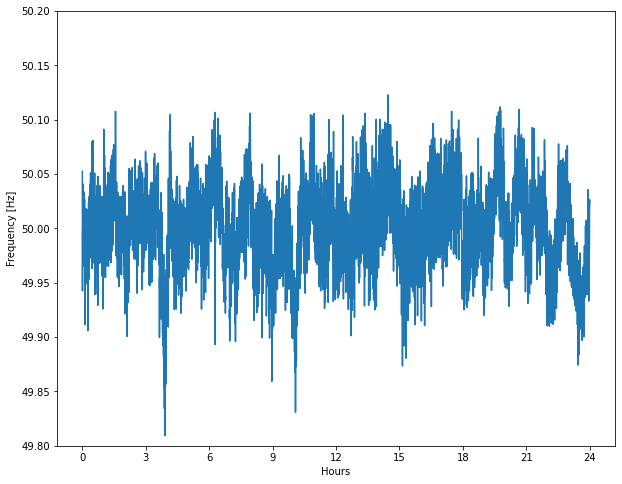

In [229]:
new_x_ticks = np.linspace(0, 24, 17280)
new_x_ticks

plt.figure(figsize=(10, 8))

plt.plot(new_x_ticks, df_dataframes[0:17280])
plt.ylim(49.8,50.2)
new_x_axis = [0,3,6,9,12,15,18,21,24]  # Replace with your desired x-axis values
plt.xticks(new_x_axis)
plt.xlabel('Hours')
plt.ylabel('Frequency [Hz]')
plt.show()

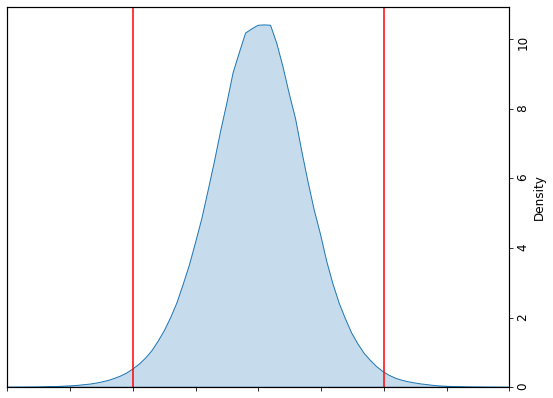

In [230]:
#fig = plt.subplots()
plt.figure(figsize=(9, 7))

sns.kdeplot(df_dataframes, fill=True)
plt.axvline(x=49.9, color='red', linestyle='-')
plt.axvline(x=50.1, color='red', linestyle='-')
plt.xlim(49.8, 50.2)
plt.xticks(rotation=90)
plt.gca().invert_xaxis() # inverts the plot
plt.gca().set_xticklabels([])

ax = plt.gca()
ax.yaxis.tick_right()
plt.yticks(rotation=90)
ax.set_ylabel('Density', labelpad=-539, fontsize=12)
plt.yticks(fontsize=12)

# Make the frame lines thinner
plt.gca().spines['top'].set_linewidth(1.2)    # Top border
plt.gca().spines['right'].set_linewidth(1.2)  # Right border
plt.gca().spines['bottom'].set_linewidth(1.2) # Bottom border
plt.gca().spines['left'].set_linewidth(1.2)   # Left border


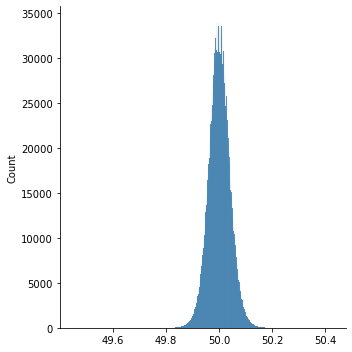

In [231]:
sns.displot(df_dataframes);

# Generated aggregation plot

In [168]:
Car1 = [6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
Car2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6]

UB = np.array([6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,])
LB = np.arange(0,61,1)

max1 = [11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11]
max2 = [22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22]

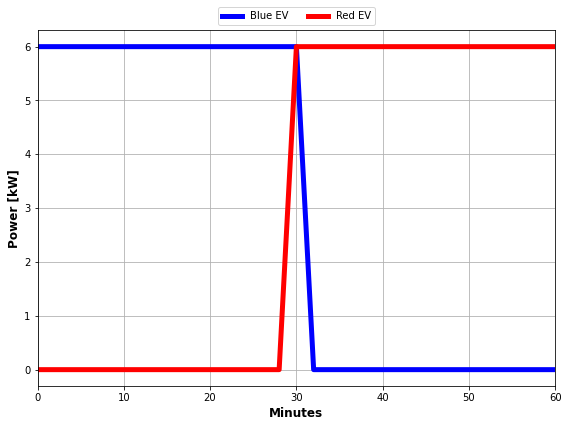

In [149]:
plt.figure(figsize=(8, 6))
plt.plot(Car1, color="blue", linewidth=5.0, label='Blue EV')
plt.plot(Car2, color="Red", linewidth=5.0, label='Red EV')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=2)
plt.xlabel('Minutes', fontsize=12, fontweight='bold')
plt.ylabel('Power [kW]', fontsize=12, fontweight='bold')
plt.xlim(0,60)
plt.grid(True)
plt.tight_layout()
plt.show()

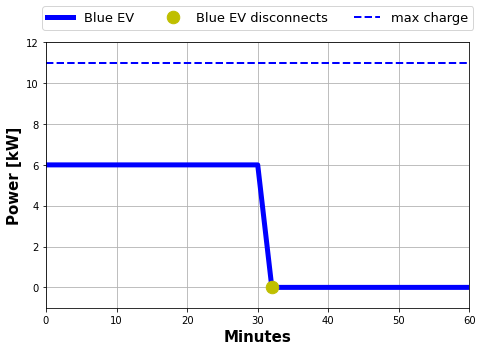

In [212]:
plt.figure(figsize=(7, 5))
plt.plot(Car1, color="blue", linewidth=5.0, label='Blue EV')
plt.plot(32, 0, 'yo', markersize=12.5, label='Blue EV disconnects')                 # Additional point
plt.plot(max1, color="Blue", linewidth=2.0, linestyle="--", label='max charge')
#plt.plot(Car2, color="Red", linewidth=5.0, label='Red EV')
#plt.plot(28, 0, 'go', markersize=12.5, label='Red EV connects')                 # Additional point
#plt.plot(max1, color="Red", linewidth=2.0, linestyle="--", label='max charge')
plt.xlabel('Minutes', fontsize=15, fontweight='bold')
plt.ylabel('Power [kW]', fontsize=15, fontweight='bold')
plt.legend(loc='upper center', fontsize=13, bbox_to_anchor=(0.5, 1.16), ncol=3)
plt.xlim(0,60)
plt.ylim(-1,12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [159]:
Total_Car = np.add(Car1,Car2)

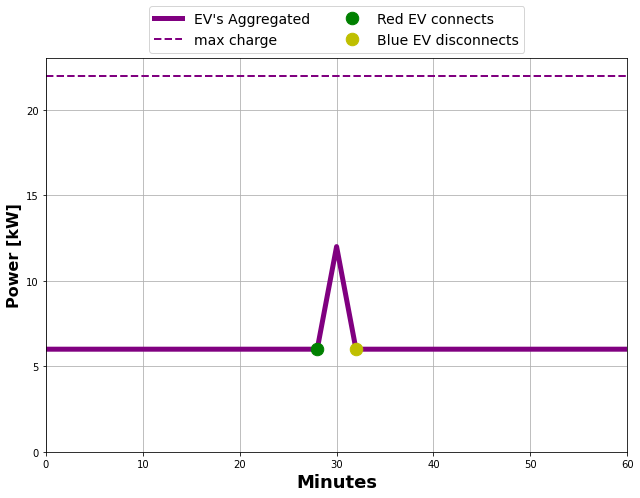

In [211]:
plt.figure(figsize=(9, 7))
plt.plot(Total_Car, color="purple", linewidth=5.0, label="EV's Aggregated")
plt.plot(max2, color="purple", linewidth=2.0, linestyle="--", label='max charge')
plt.plot(28, 6, 'go', markersize=12.5, label='Red EV connects')                 # Additional point
plt.plot(32, 6, 'yo', markersize=12.5, label='Blue EV disconnects')                 # Additional point
plt.legend(loc='upper center', fontsize=14, bbox_to_anchor=(0.5, 1.15), ncol=2)
#plt.fill_between(LB, UB, color="purple", alpha=0.4)
plt.xlabel('Minutes', fontsize=18, fontweight='bold')
plt.ylabel('Power [kW]', fontsize=16, fontweight='bold')
plt.xlim(0,60)
plt.ylim(0,23)
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
arr1 = ([])
arr2 = ([])

In [244]:
UB = np.full((2,1), 7, dtype=int),np.full((2,1), 7, dtype=int)
LB = np.arange(0,1440,1)

In [250]:
wmdqo = np.concatenate((np.full(2,1), np.full((2,1), np.full((2,1)))

SyntaxError: unexpected EOF while parsing (<ipython-input-250-4949ef778f46>, line 1)

ValueError: Input passed into argument "'y1'"is not 1-dimensional.

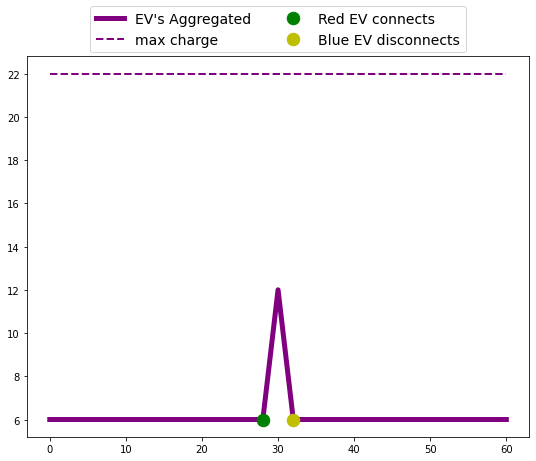

In [239]:
plt.figure(figsize=(9, 7))
plt.plot(Total_Car, color="purple", linewidth=5.0, label="EV's Aggregated")
plt.plot(max2, color="purple", linewidth=2.0, linestyle="--", label='max charge')
plt.plot(28, 6, 'go', markersize=12.5, label='Red EV connects')                 # Additional point
plt.plot(32, 6, 'yo', markersize=12.5, label='Blue EV disconnects')                 # Additional point
plt.legend(loc='upper center', fontsize=14, bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.fill_between(LB, UB, color="purple", alpha=0.4)
plt.xlabel('Minutes', fontsize=18, fontweight='bold')
plt.ylabel('Power [kW]', fontsize=16, fontweight='bold')
plt.xlim(0,60)
plt.ylim(0,23)
plt.grid(True)
plt.tight_layout()
plt.show()

# show lowering of uncertainty by aggregating

In [71]:
poisson.pmf(900, mu=100, loc=10)

0.0

In [35]:
df1544 = pd.read_csv(r"C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\1544.csv")

In [36]:
df1544

,energy_resovior (%),SoC (kWh),power(kW),connected (1 or 0),max_effect of charger (kW),minute of year,Downwards_flex,upwards_flex
0,0.0,0.0,0.0,0.0,14.4,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,14.4,2.0,0.0,0.0
2,0.0,0.0,0.0,0.0,14.4,3.0,0.0,0.0
3,0.0,0.0,0.0,0.0,14.4,4.0,0.0,0.0
4,0.0,0.0,0.0,0.0,14.4,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...
525595,0.0,0.0,0.0,0.0,14.4,525596.0,0.0,0.0
525596,0.0,0.0,0.0,0.0,14.4,525597.0,0.0,0.0
525597,0.0,0.0,0.0,0.0,14.4,525598.0,0.0,0.0
525598,0.0,0.0,0.0,0.0,14.4,525599.0,0.0,0.0


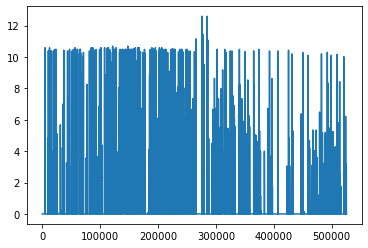

In [41]:
plt.plot(df1544["power(kW)"])

In [ ]:
file_names2 = os.listdir("C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90")

                        

# Create a dictionary to store the loaded dataframes
dataframes2 = {}

# Create a list to store the dataframe names
dataframe_names2 = []

# Load the CSV files and store them in the dictionary
for file_name in file_names2:
    file_path = os.path.join("C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90", file_name)
    dataframe_name = file_name  # Remove the ".csv" extension and the first 3 characters, so only the CD numer is there
    dataframes2[dataframe_name] = pd.read_csv("C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90", parse_dates=['Time'])
    dataframe_names2.append(dataframe_name)

In [330]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from ipywidgets import interact

def plot_gamma_distribution(k=1.0, theta=1.0):
    # Generate values for the x-axis (range of possible values)
    x = np.linspace(0, 100, 400)

    # Calculate the Gamma probability density function
    y = gamma.pdf(x, a=k, scale=theta)

    # Plotting the distribution
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f'k (Shape): {k}, θ (Scale): {theta}')
    plt.title('Gamma Distribution')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.xlim(1,100)
    plt.grid(True)
    plt.show()

# Create interactive sliders for the shape and scale parameters
interact(plot_gamma_distribution, k=(1, 100.0, 1), theta=(0, 10.0, 0.2))


interactive(children=(FloatSlider(value=1.0, description='k', min=1.0, step=1.0), FloatSlider(value=1.0, descr…

<function __main__.plot_gamma_distribution(k=1.0, theta=1.0)>

In [352]:
k1 = 9.25
k2 = 3.5
#k3 = 2
theta1 = 4
theta2 = 13.2
#theta3 = 70

x1 = np.linspace(0, 100, 400)
x2 = np.linspace(0, 100, 400)
#x3 = np.linspace(0, 1100, 400)

# Calculate the Gamma probability density function
y1 = gamma.pdf(x1, a=k1, scale=theta1)
y2 = gamma.pdf(x2, a=k2, scale=theta2)
#y3 = gamma.pdf(x3, a=k3, scale=theta3)

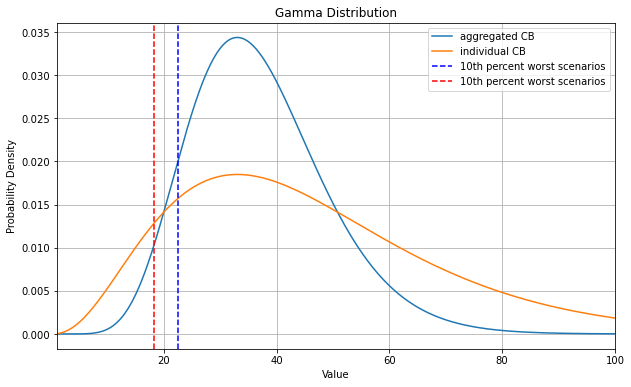

In [354]:
# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, label="aggregated CB")
plt.plot(x2, y2, label="individual CB")
plt.axvline(x=90/4, color='blue', linestyle='--', label="10th percent worst scenarios")
plt.axvline(x=73/4, color='r', linestyle='--', label="10th percent worst scenarios")
#plt.plot(x3, y3, label=f'k (Shape): {k3}, θ (Scale): {theta3}')
plt.title('Gamma Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.xlim(1,100)
plt.grid(True)
plt.show()

In [260]:
print(np.mean(gamma.pdf(x1, a=k1, scale=theta1)))
print(np.mean(gamma.pdf(x2, a=k2, scale=theta2)))


0.00997402567014784
0.009637100539941818


In [261]:
arr1 = gamma.pdf(x1, a=k1, scale=theta1)
arr2 = gamma.pdf(x2, a=k2, scale=theta2)

In [262]:
np.argmax(arr1),np.argmax(arr2)

(132, 132)

In [263]:
sum(arr1)*0.1,sum(arr2)*0.1

(0.39896102680591344, 0.3854840215976727)

In [264]:
sum(arr1[0:90]),sum(arr2[0:74])

(0.392305128841343, 0.38449190810144485)

In [436]:
k1 = 43
k2 = 4.31
theta1 = 1.5
theta2 = 19

x1 = np.linspace(0, 100, 400)
x2 = np.linspace(0, 100, 400)

# Calculate the Gamma probability density function
y1 = gamma.pdf(x1, a=k1, scale=theta1)
y2 = gamma.pdf(x2, a=k2, scale=theta2)
y1 = y1[::-1]
y2 = y2[::-1]
y1 = y1/sum(y1)
y2 = y2/sum(y2)

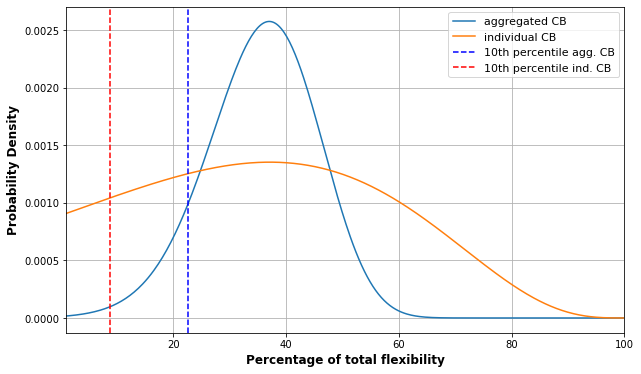

In [459]:
# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.plot(x1, y1/3.986856562850009, label="aggregated CB")
plt.plot(x2, y2/2.883043463071468, label="individual CB")
plt.axvline(x=90/4, color='blue', linestyle='--', label="10th percentile agg. CB")
plt.axvline(x=35/4, color='r', linestyle='--', label="10th percentile ind. CB")
#plt.plot(x3, y3, label=f'k (Shape): {k3}, θ (Scale): {theta3}')
#plt.title('The probability of having given amount of flexibility in a random hour')
plt.xlabel('Percentage of total flexibility', fontsize=12, fontweight='bold')
plt.ylabel('Probability Density', fontsize=12, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True)
plt.xlim(1,100)
plt.grid(True)
plt.show()

In [438]:
np.argmax(y1),np.argmax(y2)

(148, 148)

In [439]:
sum(y1)*0.1,sum(y2)*0.1

(0.10000000000000009, 0.09999999999999995)

In [450]:
sum(y1[0:91]),sum(y2[0:35])

(0.10031209720399713, 0.09744393416065682)